# Multi-level Quantum Circuit Partitioning

Full workflow for partitioning quantum circuits using a multi-level Fiduccia-Mattheyses algorithm.

The workflow begins by transpiling a quantum circuit into the controlled phase and general unitary gate set. This is done using the qiskit transpile function.

The circuit is then converted into a GCP hypergraph, with a node for each qubit at each time-step of the circuit, edges connecting successor nodes for each qubit, and hyperedges connecting nodes involved in distributable gates.

In [ ]:
from MLFM_GCP.circuits.cp_fraction import cp_fraction
from MLFM_GCP.graphs.GCP_hypergraph import QuantumCircuitHyperGraph
from qiskit import transpile
from MLFM_GCP.partitioning.FM.FM_methods import set_initial_partitions
from qiskit.circuit.library import QFT, QuantumVolume, EfficientSU2
from MLFM_GCP.circuits.QAOA import QAOA_random
import numpy as np

num_qubits = 16
num_partitions = 2
qpu_size = int(num_qubits / num_partitions) + 1
qpu_info = [qpu_size] * num_partitions


circuit = cp_fraction(  num_qubits=num_qubits,
                        depth=num_qubits,
                        fraction= 0.3)


circuit = transpile(circuit, basis_gates = ['cp', 'u'])

depth = circuit.depth()

graph = QuantumCircuitHyperGraph(circuit, group_gates = True, anti_diag = True)
assignment = set_initial_partitions(qpu_info, num_qubits, depth, num_partitions, reduced = True)





In [1]:
# from src.FM_main import run_FM

# final_cost, final_assignment, cost_list = run_FM(
#     graph,
#     assignment,
#     qpu_info,
#     num_partitions,
#     limit=num_qubits*graph.depth/8,
#     max_gain=4,
#     passes=100,
#     stochastic=True,
#     active_nodes=graph.nodes,
#     log = False,
#     add_initial = False,
#     costs = None
# )

# print("cost list", cost_list)


In [2]:
# from src.multilevel_FM import *

# assignment_list, cost_list, time_list = MLFM_window(graph,
#                 num_levels=8,
#                 initial_assignment=assignment,  
#                 qpu_info= qpu_info, 
#                 limit = None, 
#                 pass_list= None, 
#                 stochastic=True, 
#                 lock_nodes=True,
#                 log = False,
#                 add_initial = False,
#                 costs = None)

# print(min(cost_list))

# start = time.time()
# final_cost = optimise_detached_hyperedges(graph, assignment_list[np.argmin(cost_list)], num_partitions, costs)
# print("Extra time:", time.time() - start)

# print(final_cost)

In [3]:
# assignment_list, cost_list, time_list = MLFM_blocks(graph,
#                 num_blocks=8,
#                 initial_assignment=assignment,  
#                 qpu_info= qpu_info, 
#                 limit = None, 
#                 pass_list= None, 
#                 stochastic=True, 
#                 lock_nodes=True,
#                 log = False,
#                 add_initial = False,
#                 costs = None,
#                 full = True)

# print(min(cost_list))

# final_cost = optimise_detached_hyperedges(graph, assignment_list[np.argmin(cost_list)], num_partitions, costs)
# print(final_cost)

In [4]:
from MLFM_GCP.partitioning.FM.multilevel_FM import MLFM_recursive
from MLFM_GCP.partitioning.FM.FM_methods import calculate_full_cost

import time

passes = [5] * 12

assignment_list, cost_list, time_list = MLFM_recursive(graph,
                                        assignment,  
                                        qpu_info, 
                                        limit = 'qubit', 
                                        pass_list = None, 
                                        stochastic = True, 
                                        lock_nodes = False,
                                        log = True,
                                        add_initial = False,
                                        costs = None,
                                        level_limit = None)

print(min(cost_list))

assignment = assignment_list[np.argmin(cost_list)]

# for i, ass in enumerate(assignment_list):

#     print('Cost:', calculate_full_cost(graph, ass, num_partitions, costs))
#     print('Cost from list:', cost_list[i])

# start = time.time()
# final_cost = optimise_detached_hyperedges(graph, assignment, num_partitions, costs)
# end = time.time()
# print("Extra time:", end - start)
# print(final_cost)

KeyboardInterrupt: 

In [ ]:
from MLFM_GCP..tikz_drawing import *
from src.mpl_drawing import *
assignment = assignment_list[np.argmin(cost_list)]

mpl_fig = hypergraph_to_matplotlib(
    graph, 
    num_qubits,
    assignment,
    qpu_info,
    depth,
    sum(qpu_info),
    xscale=15.0,
    yscale=25.0,
    figsize=(10, 6),
    save=False,
    path=None,
    ax=None
)

ModuleNotFoundError: No module named 'src'

In [ ]:
num_qubits = 48
num_partitions = 6
qpu_size = int(num_qubits / num_partitions) + 1
qpu_info = [qpu_size] * num_partitions


circuit = cp_fraction(  num_qubits=num_qubits,
                        depth=num_qubits,
                        fraction= 0.9 )

# circuit = QFT(num_qubits, do_swaps=False)

# circuit = QuantumVolume(num_qubits, depth=num_qubits)

# circuit = QAOA_random(num_qubits, prob = 0.9, reps = 1)

# ansatz = EfficientSU2(num_qubits, entanglement='full', reps=1)

# param_values = np.random.rand(len(ansatz.parameters))
# param_dict = dict(zip(ansatz.parameters, param_values))
# circuit = ansatz.assign_parameters(param_dict)
cost_list_diag = []
cost_list_anti = []

for i in range(20):
    print("Iteration", i)
    circuit = transpile(circuit, basis_gates = ['cp', 'u'])

    depth = circuit.depth()

    graph = QuantumCircuitHyperGraph(circuit, group_gates=True)
    assignment = set_initial_partitions(qpu_info, num_qubits, depth, num_partitions, reduced = True)

    assignment_list, cost_list, time_list = MLFM_recursive(graph,
                                        assignment,  
                                        qpu_info, 
                                        limit = None, 
                                        pass_list= None, 
                                        stochastic=True, 
                                        lock_nodes=False,
                                        log = False,
                                        add_initial = False,
                                        costs = None)
    
    cost_list_diag.append(min(cost_list))

    graph = QuantumCircuitHyperGraph(num_qubits=num_qubits, depth=depth)
    graph.map_circuit_to_hypergraph(circuit, group_gates=True, anti_diag = True)
    assignment = set_initial_partitions(qpu_info, num_qubits, depth, num_partitions, reduced = True)

    assignment_list, cost_list, time_list = MLFM_recursive(graph,
                                        assignment,  
                                        qpu_info, 
                                        limit = None, 
                                        pass_list= None, 
                                        stochastic=True, 
                                        lock_nodes=False,
                                        log = False,
                                        add_initial = False,
                                        costs = None)

    cost_list_anti.append(min(cost_list))

    



Iteration 0


KeyboardInterrupt: 

In [ ]:
print(np.mean(cost_list_diag))
print(np.mean(cost_list_anti))

284.8
282.4


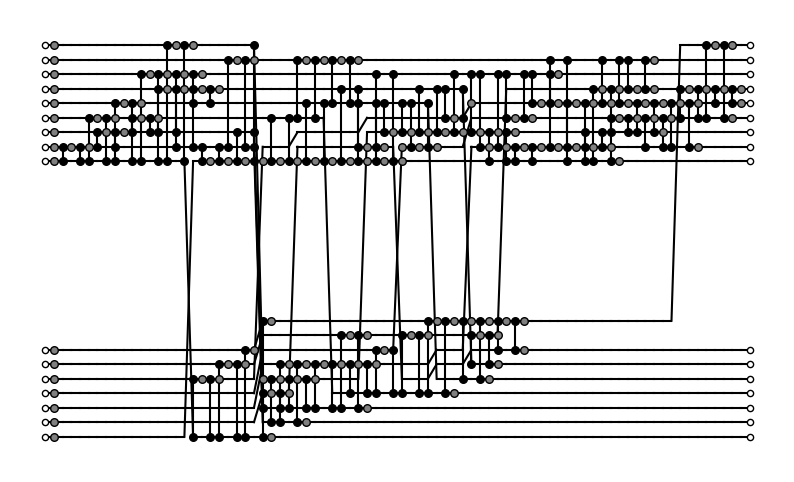

In [ ]:
from src.tikz_drawing import *
from src.mpl_drawing import *
assignment = assignment_list[np.argmin(cost_list)]

mpl_fig = hypergraph_to_matplotlib(
    graph, 
    num_qubits,
    assignment,
    qpu_info,
    depth,
    sum(qpu_info),
    xscale=15.0,
    yscale=25.0,
    figsize=(10, 6),
    save=False,
    path=None,
    ax=None
)